In [1]:
import random
import os

from torch.utils.data import Dataset, DataLoader
from easydict import EasyDict as edict
from imutils.paths import list_images
from matplotlib import pyplot as plt
from torchvision import transforms
import numpy as np
import cv2

/root/anaconda3/envs/torch_1.x/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
SEP       = os.path.sep
ROOT_PATH = '/home'
DATA_PATH = f'{ROOT_PATH}/projects/DataSets/PerSAM'

In [3]:
mask_paths  = sorted(list_images(f'{DATA_PATH}/Annotations'))
image_paths = sorted(list_images(f'{DATA_PATH}/Images')) 

In [4]:
random_idx  = np.random.randint(0, len(mask_paths))
image       = cv2.imread(image_paths[random_idx])
image       = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask        = cv2.imread(mask_paths[random_idx] , cv2.IMREAD_GRAYSCALE)

(-0.5, 1072.5, 1072.5, -0.5)

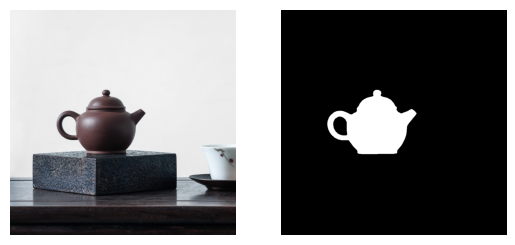

In [5]:
_, axes     = plt.subplots(1, 2)
axes[0].imshow(image)
axes[1].imshow(mask, cmap = 'gray')

axes[0].axis(False)
axes[1].axis(False)

(-0.5, 1072.5, 1072.5, -0.5)

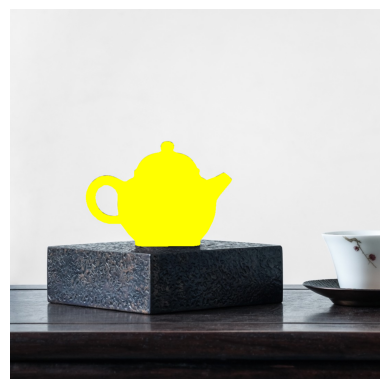

In [6]:
segmentation = mask + np.zeros(mask.shape, np.uint8)
image_cp     = image.copy()

H, W         = image.shape[:2]
segmentation = cv2.resize(segmentation, (W, H))
masked_image = np.where(segmentation[..., None], (255, 255, 0), image_cp)

plt.imshow(masked_image)
plt.axis(False)